In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: ylabel='BMI'>

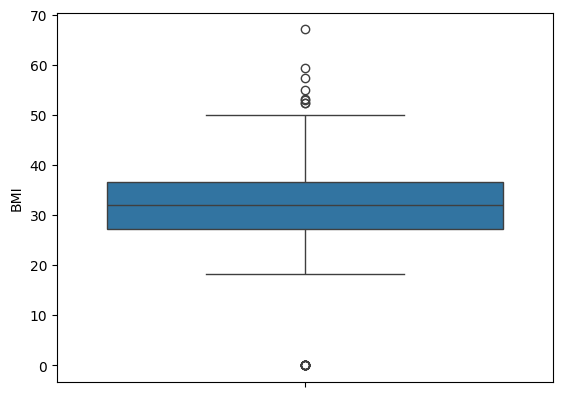

In [4]:
sns.boxplot(df['BMI'])

In [5]:
df['Pregnancies'] =  df['Pregnancies'].apply(lambda x: df['Pregnancies'].median() if x > 12 else x)
df['Glucose'] = df['Glucose'].apply(lambda x: df['Glucose'].mean() if x < 25 else x )
df['BloodPressure'] =  df['BloodPressure'].apply(lambda x: df['BloodPressure'].mean() if x < 40 else x )
df['SkinThickness'] =  df['SkinThickness'].apply(lambda x: df['SkinThickness'].mean() if x > 80  else x )
df['Insulin'] =  df['Insulin'].apply(lambda x: df['Insulin'].mean() if x > 300  else x )
df['BMI'] =  df['BMI'].apply(lambda x: df['BMI'].mean() if x < 10 or x > 60   else x )

# KNeighborsClassifier

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

In [7]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [9]:
model = KNeighborsClassifier()

In [10]:
params = {
    'n_neighbors': [i for i in range(50)],
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
}

In [11]:
final_model = GridSearchCV(model, param_grid=params, verbose=1, cv=3, n_jobs=-1)

In [12]:
final_model.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


,estimator,KNeighborsClassifier()
,param_grid,"{'metric': ['minkowski', 'euclidean', ...], 'n_neighbors': [0, 1, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,11


In [13]:
final_model.best_params_

{'metric': 'manhattan', 'n_neighbors': 11}

In [14]:
y_pred = final_model.predict(X_test)

In [15]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       112
           1       0.63      0.81      0.71        42

    accuracy                           0.82       154
   macro avg       0.77      0.82      0.79       154
weighted avg       0.84      0.82      0.82       154



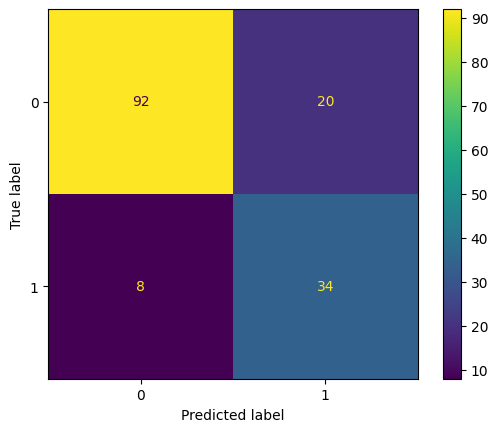

In [16]:
ConfusionMatrixDisplay(confusion_matrix(y_pred, y_test)).plot()